# Summary

Pointer Networks (Ptr-Nets) introduce a novel neural network architecture designed to handle problems where the output is a sequence of discrete tokens from the input, rather than generating arbitrary tokens. They extend sequence-to-sequence (Seq2Seq) models by using an attention mechanism to point to positions in the input sequence, enabling tasks where the output is a permutation of the input. 


# Main Contributions

1. Pointer Mechanism:
   * The core innovation is the pointer mechanism, which replaces the standard decoder softmax layer with a distribution over the input sequence.
   * This allows the model to "point" to specific input positions rather than generating new vocabulary words. It is particularly suitable for combinatorial optimization problems.
  
2. Applicability to Combinatorial Problems:
   * Ptr-Nets are demonstrated on tasks such as:
     * Sorting Numbers: Mapping an unordered sequence to its sorted order.
     * Convex Hull: Finding the vertices of the convex hull in a 2D space in clockwise order.
     * Traveling Salesman Problem (TSP): Predicting the shortest path for small graphs.
   * These tasks involve producing outputs that are permutations or subsets of the input.
  
3. Model Architecture:
   * Encoder-Decoder Framework: Built on the Seq2Seq model, it uses RNNs for encoding and decoding.
   * Attention as a Pointer: The attention mechanism computes a distribution over the input sequence at each decoding step, which acts as a pointer to select specific input elements.
   * The attention scores are directly used to select outputs, ensuring the output corresponds to the input indices.
  
4. Training:
   * The model is trained end-to-end using supervised learning with labeled input-output pairs.
   * A sequence loss function based on cross-entropy is used, encouraging the model to select the correct input indices at each decoding step.
  
5. Results
   * Ptr-Nets show competitive performance on small-scale combinatorial tasks and provide a novel approach to handling problems traditionally solved using specialized algorithms.
  

# Technical Details

1. Encoder:
   Processes the input sequence $x=(x_1, x_2, ..., x_n)$ using a bi-directional LSTM to produce hidden states $h_i$ for each input $x_i$.

2. Decoder:
   An LSTM decoder generates an output sequence by attending over the encoder states at each step using a learned attention mechanism.
   
3. Pointer Mechanism:
   The attention mechanism computes
   $\displaystyle u^t_i = v^T tanh(W_1 h_i + W_2 s_t + b)$
   where:
   * $h_i$: encoder hidden state for input $x_i$
   * $s_t$: decoder hidden state at time $t$
   * $W_1, W_2, v, b$: learnable parameters

   The softmax over $u^t_i$ providdes a probability distribution over input indices.

4. Output:
   At each decoding step $t$, the model selects an input index $i$ with the highest probability.


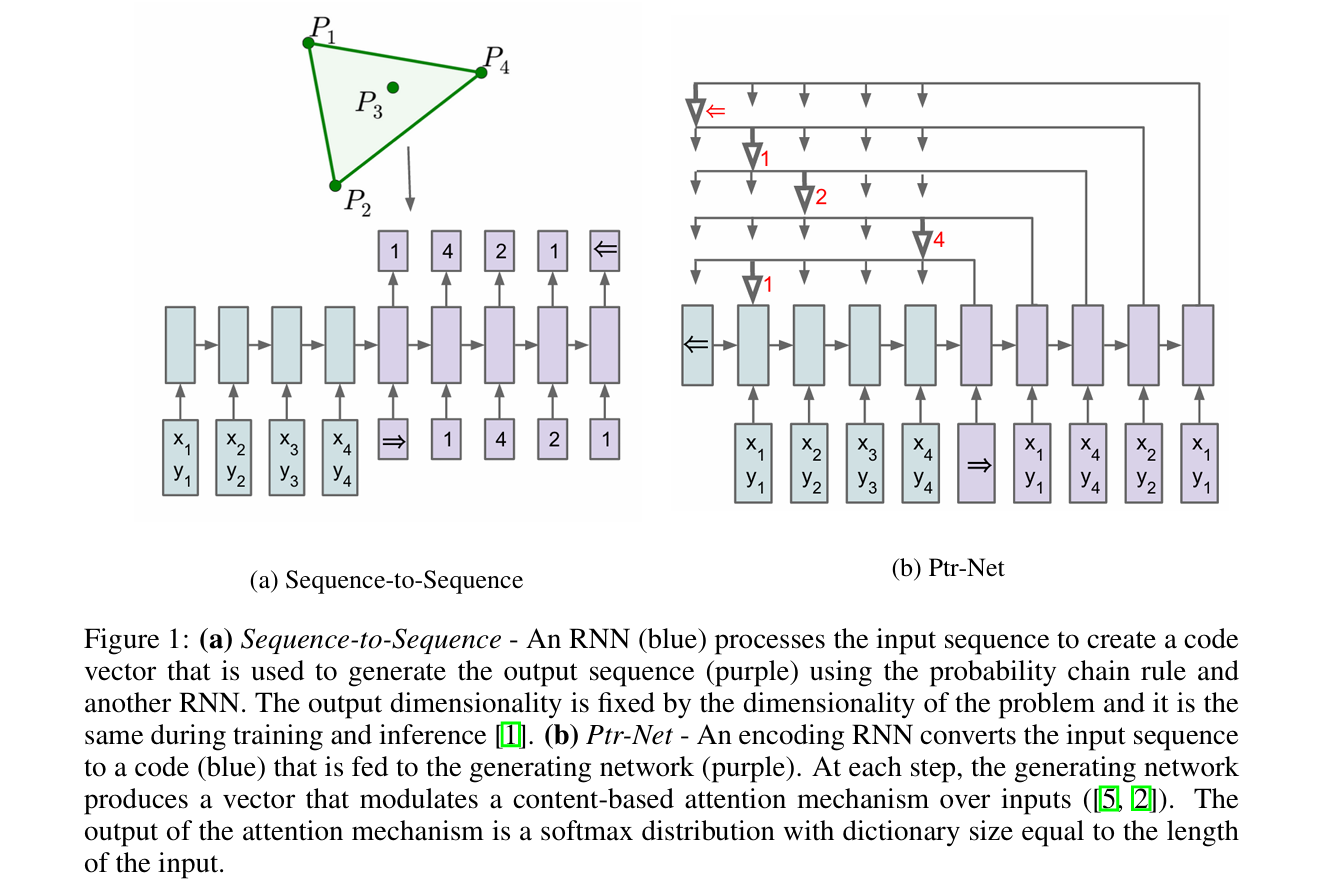

# Potential Research Directions

1. Integration with RL:
   Combining Pointer Networks with RL (e.g., policy gradient methods) can allow tackling tasks without requiring labeled solutions, such as TSP with unknown optimal paths.